## Lead scoring case study.

### Importing the data and Analysing it. 

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data = df.copy()

In [4]:
data.shape

(9240, 37)

In [5]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data preparation

In [7]:
data = data.drop('Prospect ID', axis = 1)

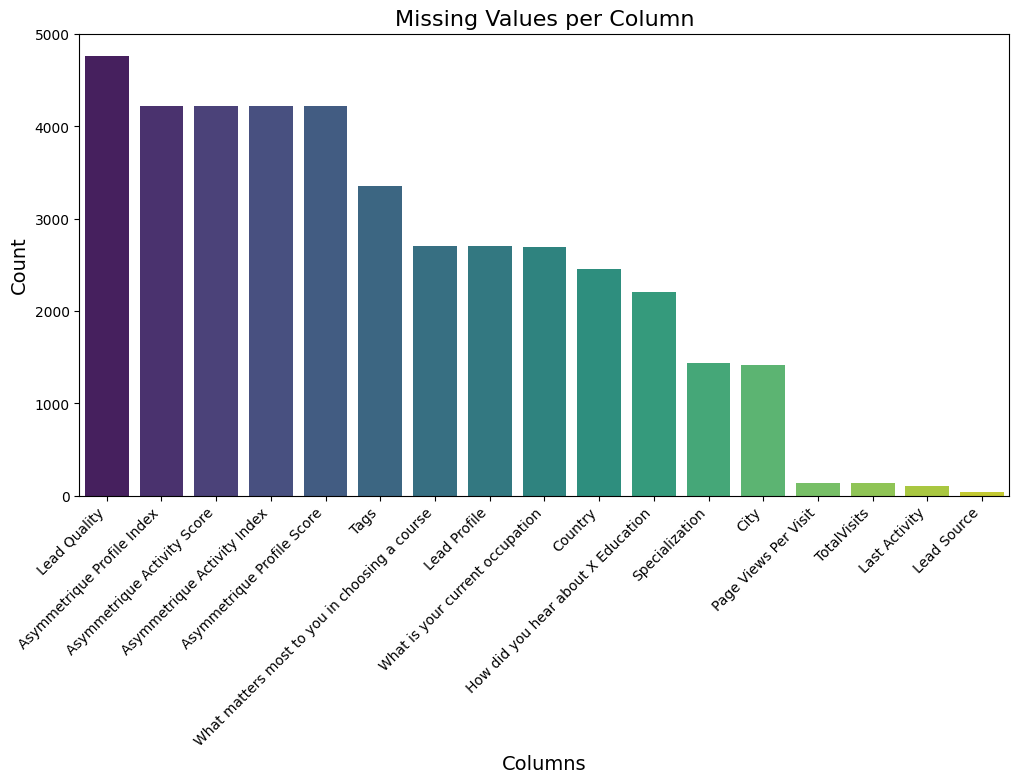

In [8]:
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0]

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Missing Values per Column", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Columns", fontsize=14)
plt.show()

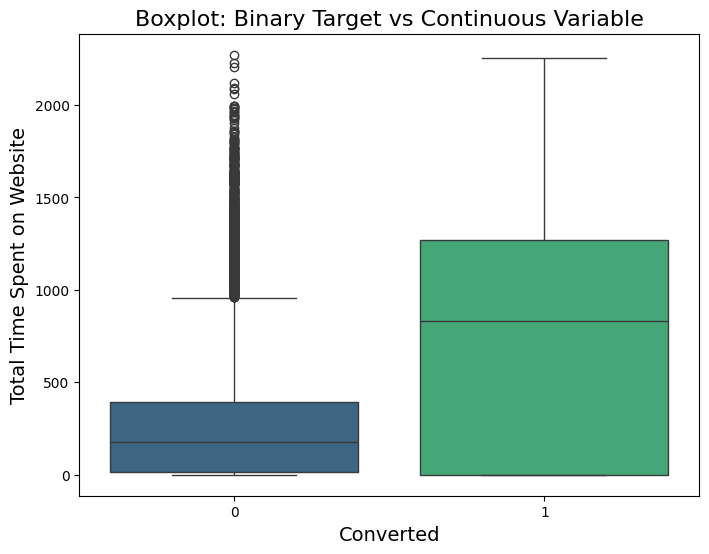

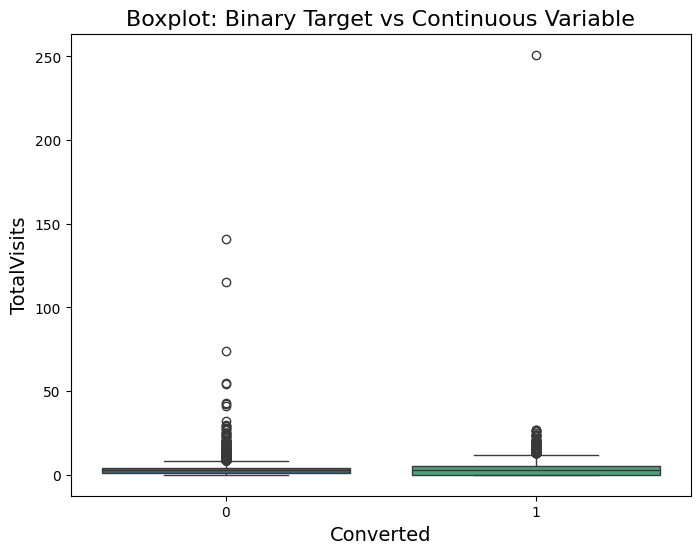

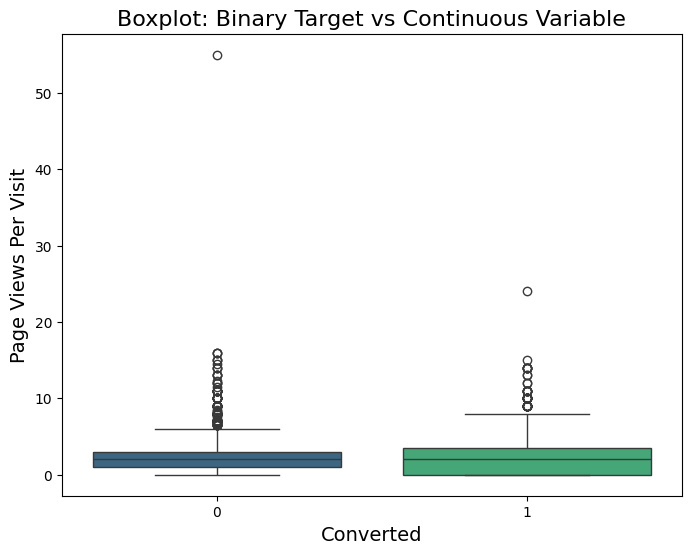

In [9]:
numerical_vars = ['Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']
for i in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Converted', y=i, data=data, palette="viridis")
    plt.title('Boxplot: Binary Target vs Continuous Variable', fontsize=16)
    plt.xlabel('Converted', fontsize=14)
    plt.ylabel(i, fontsize=14)
    plt.show()

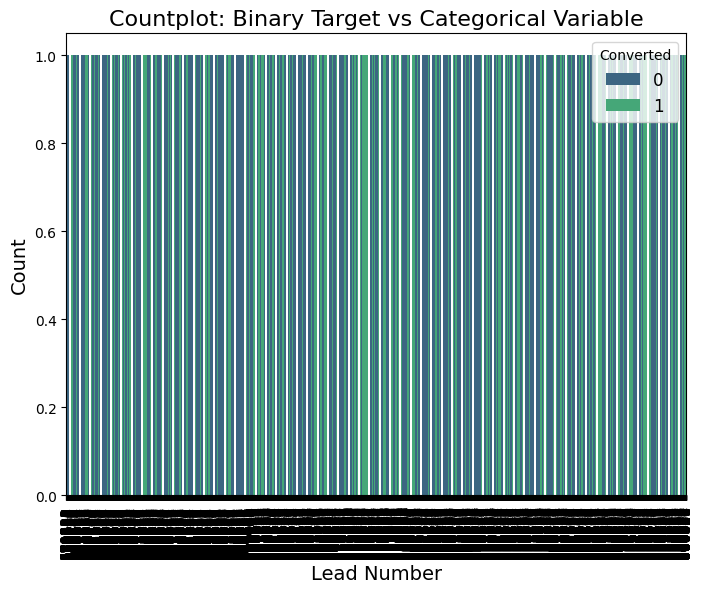

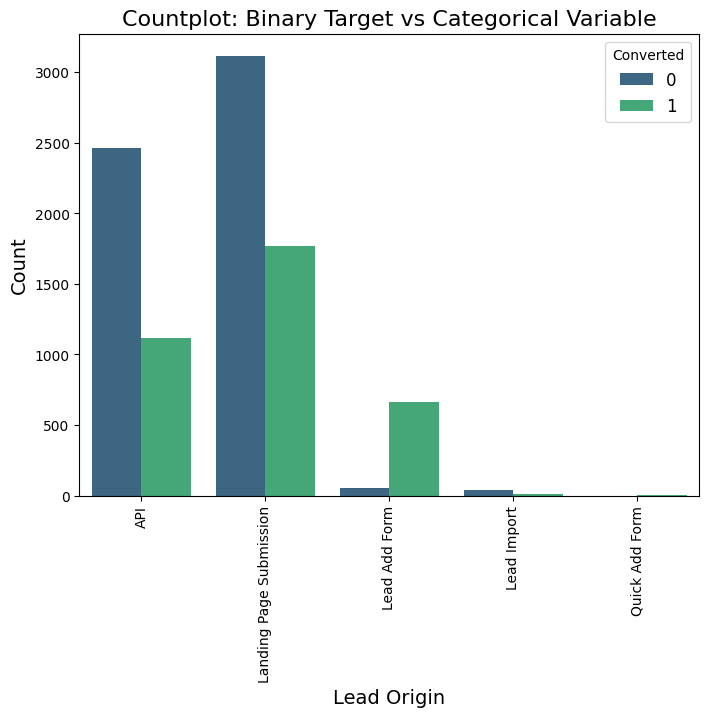

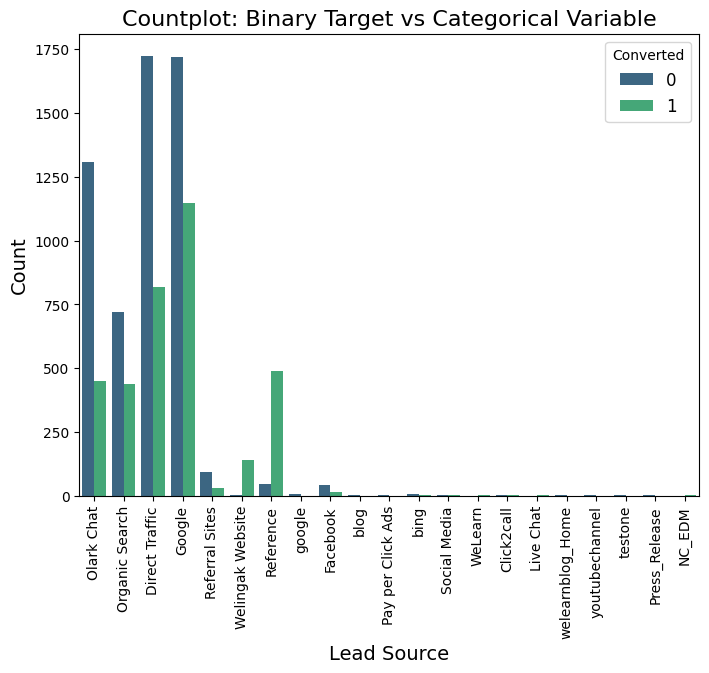

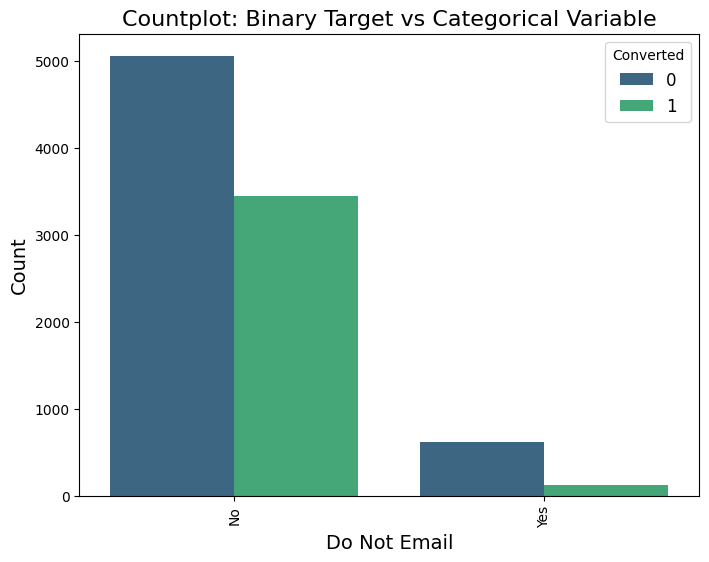

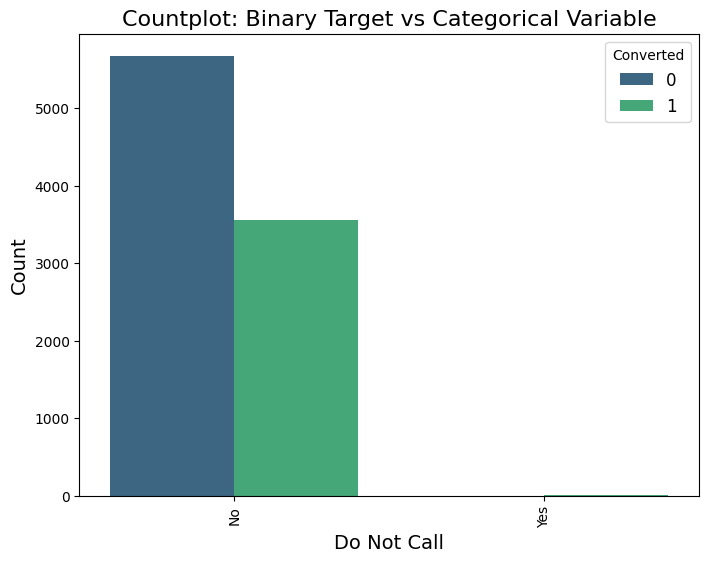

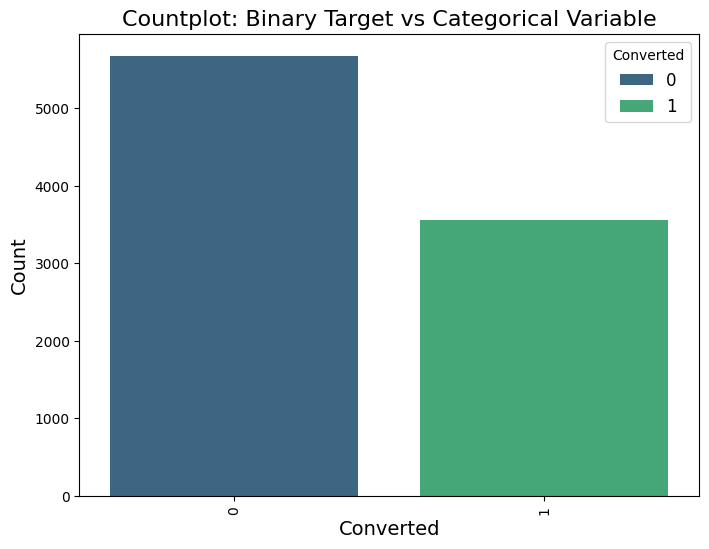

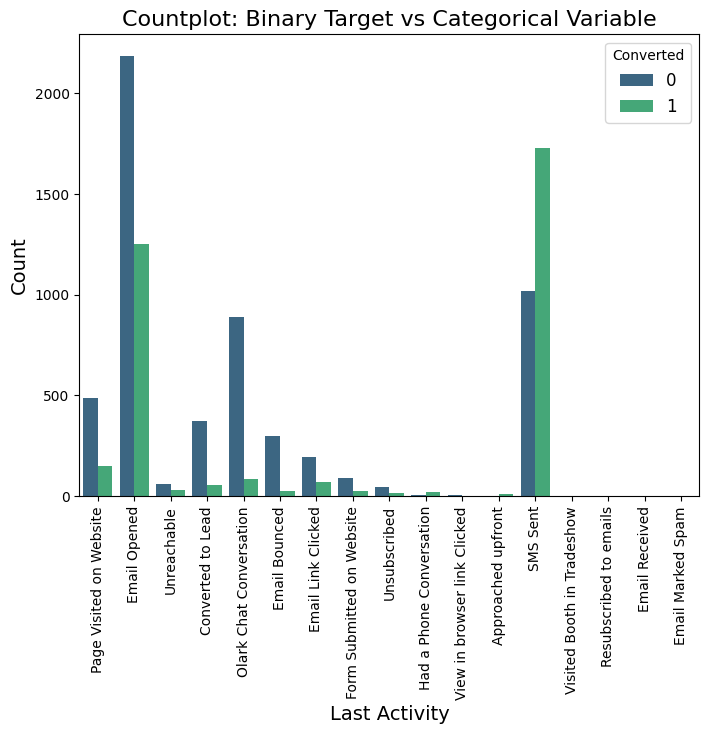

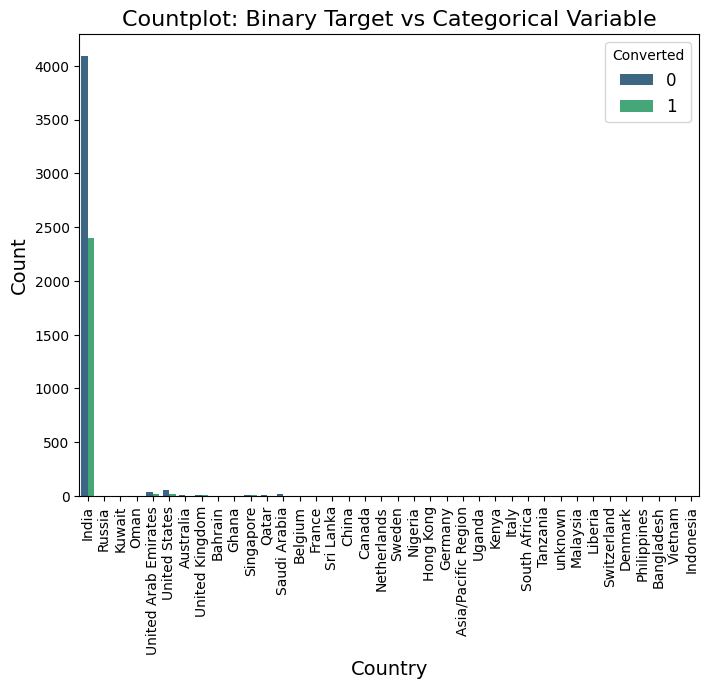

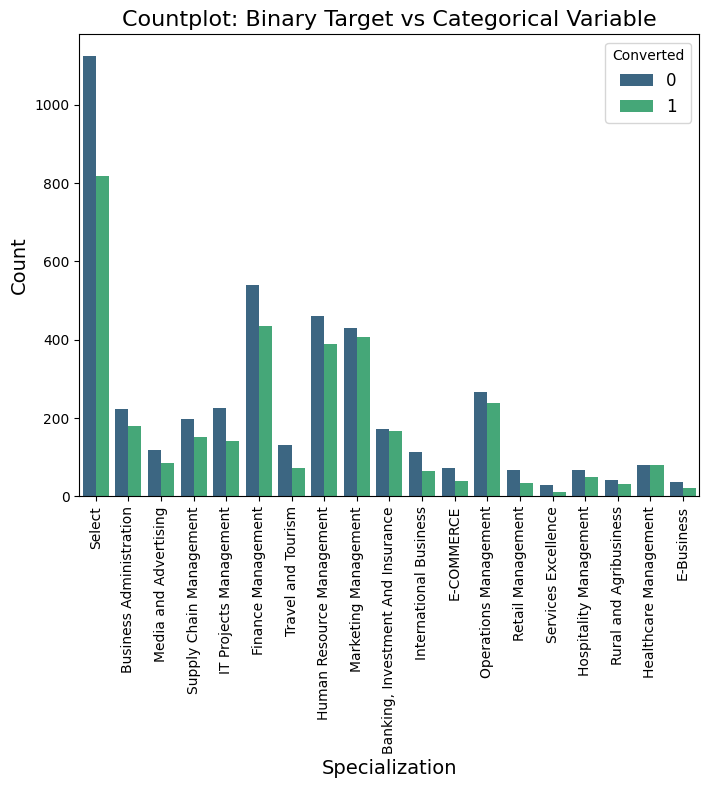

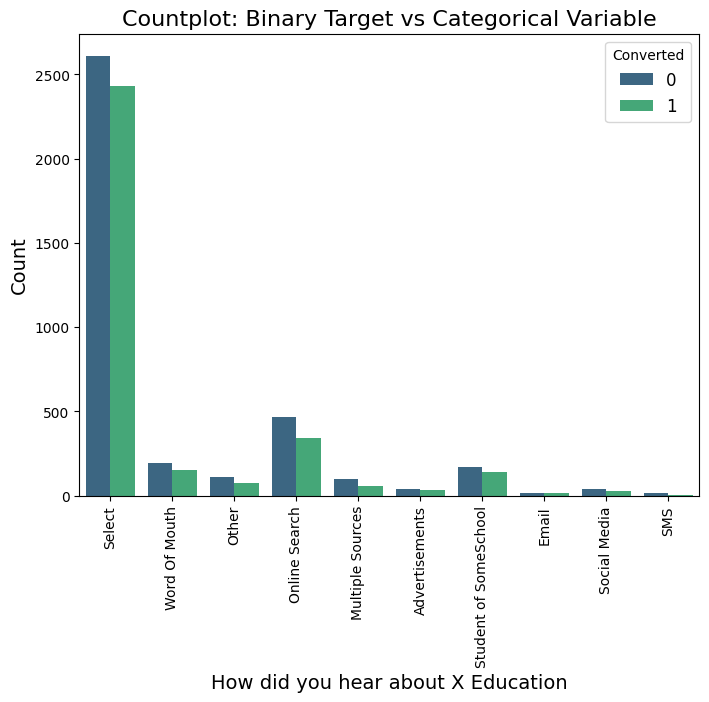

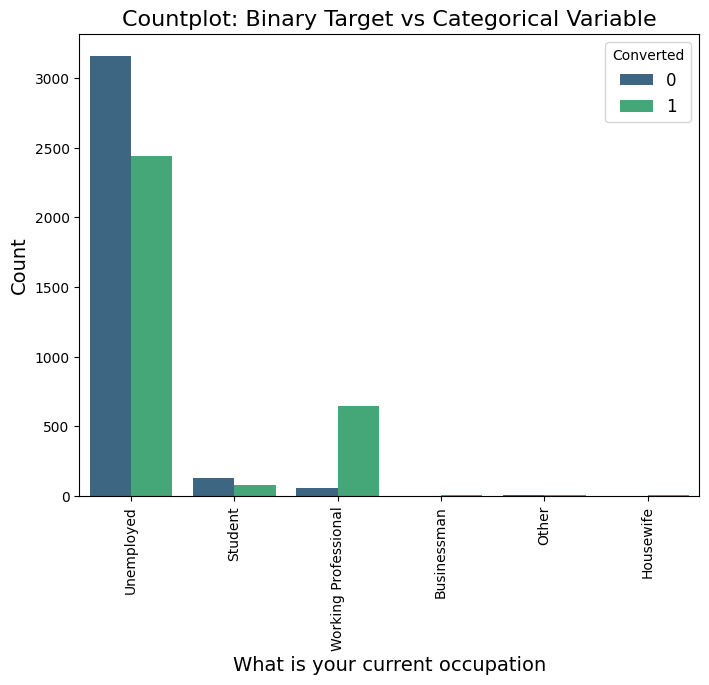

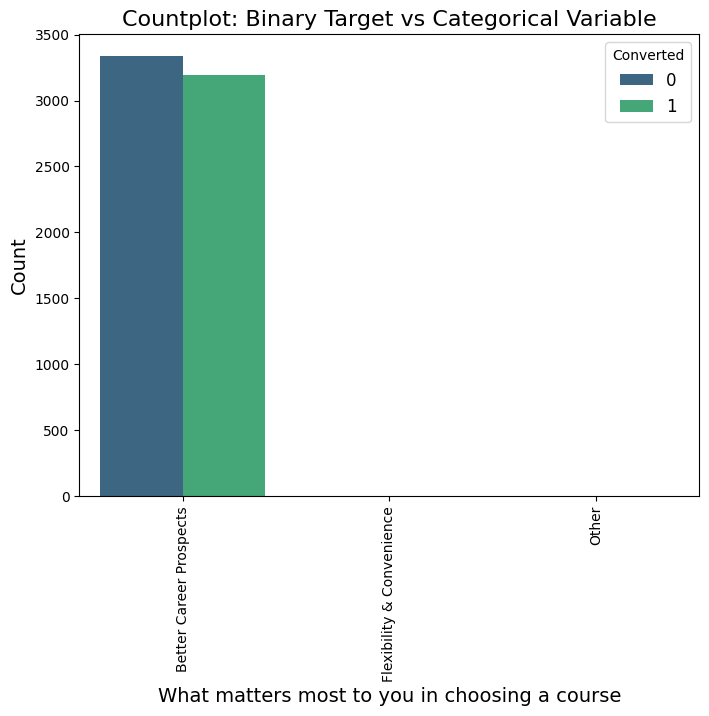

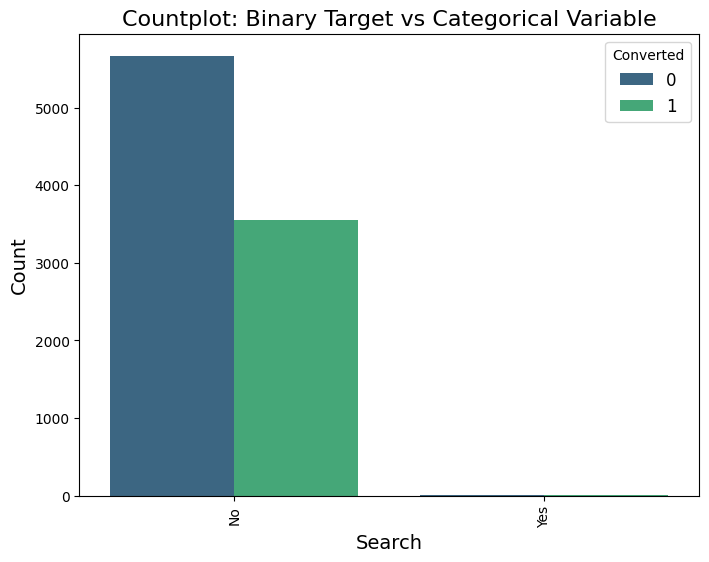

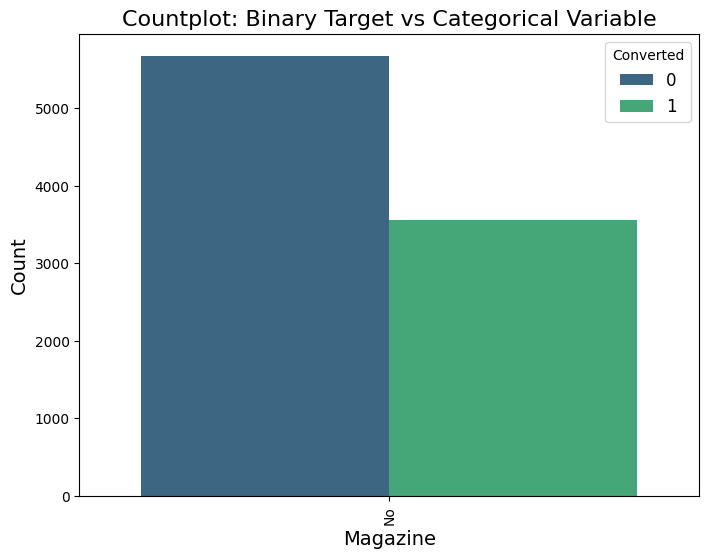

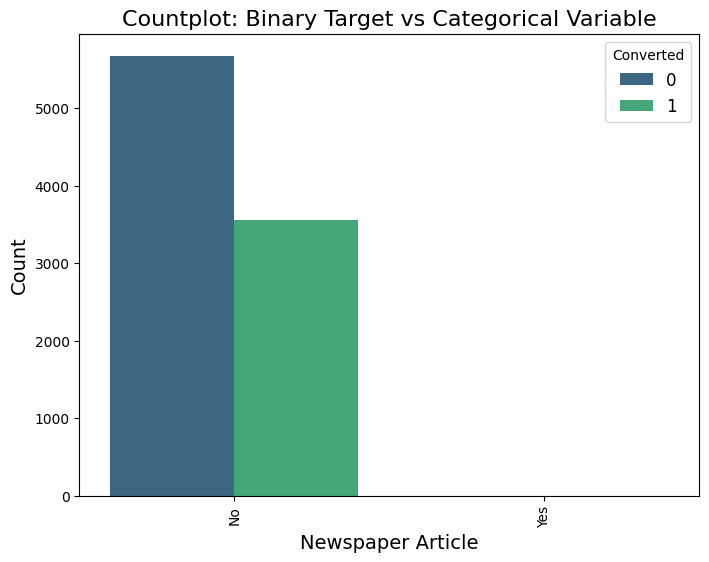

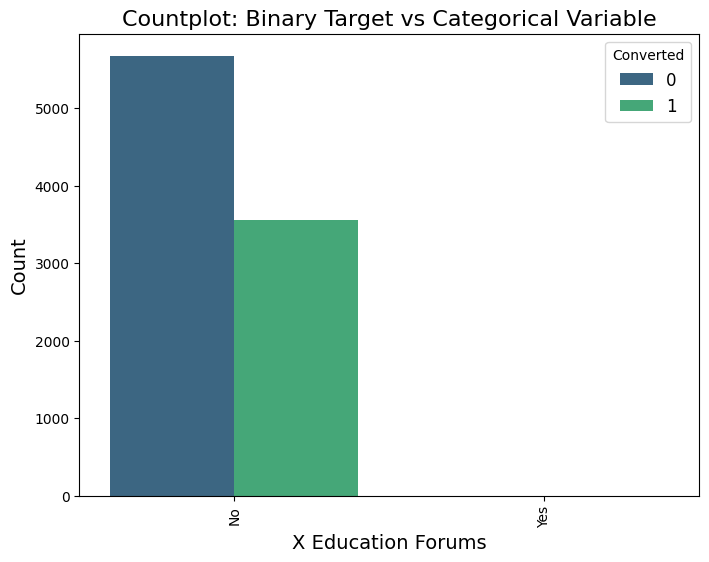

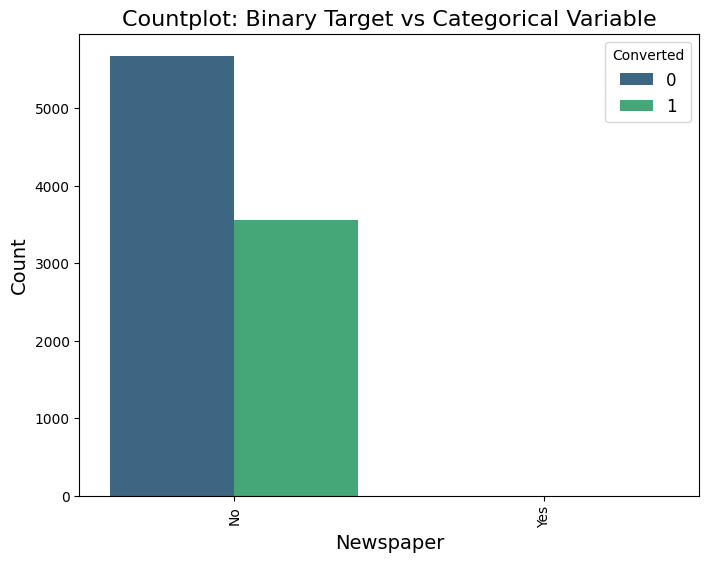

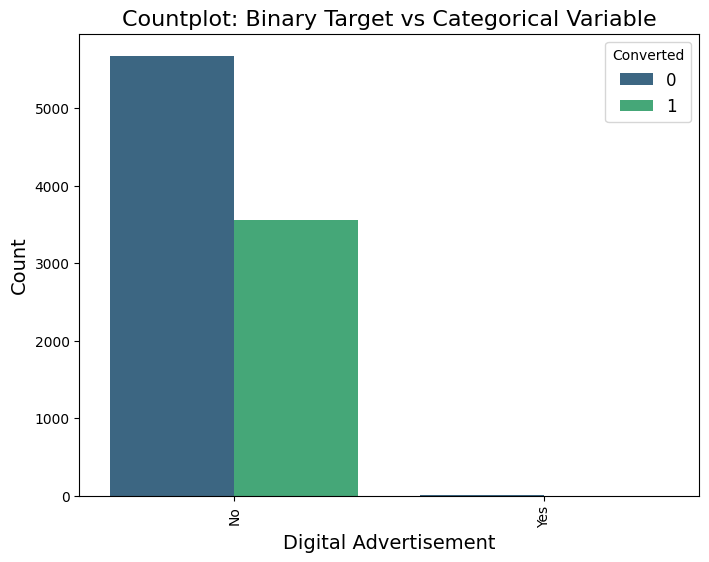

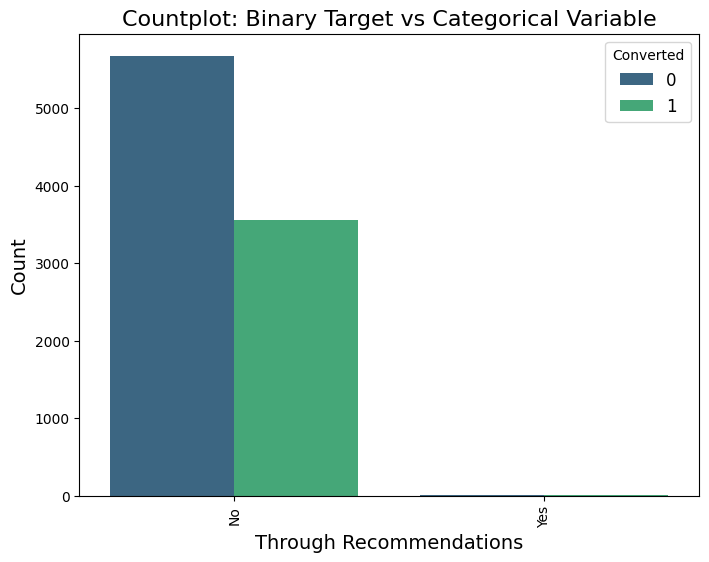

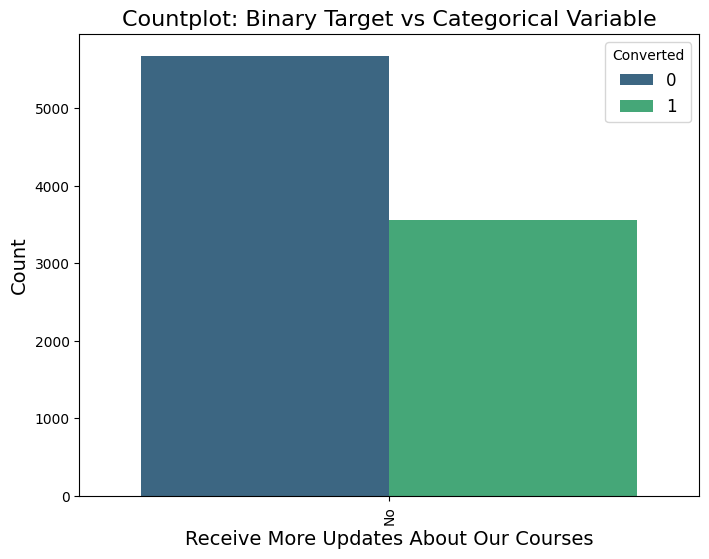

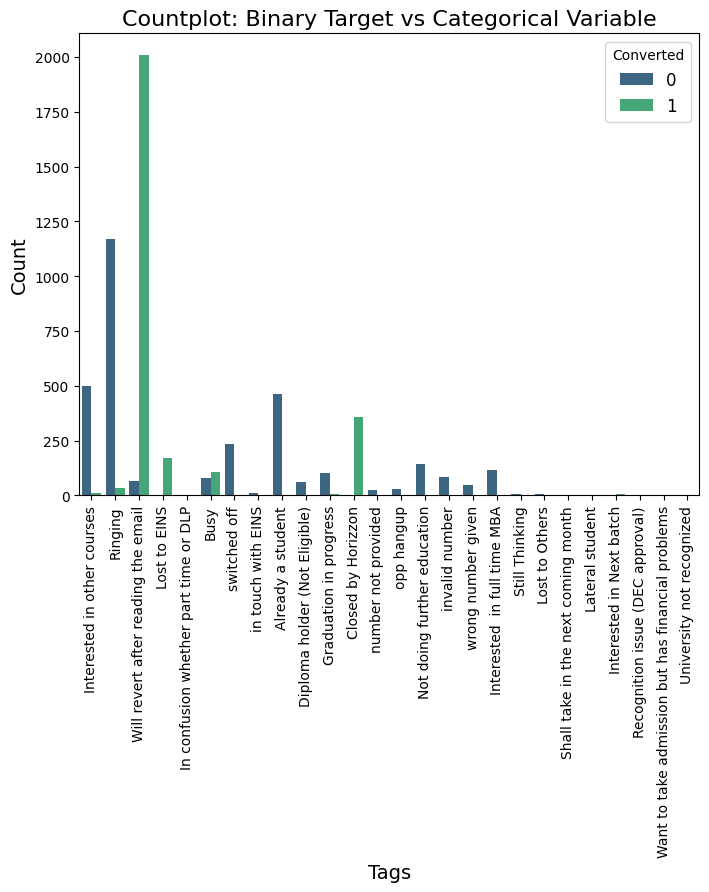

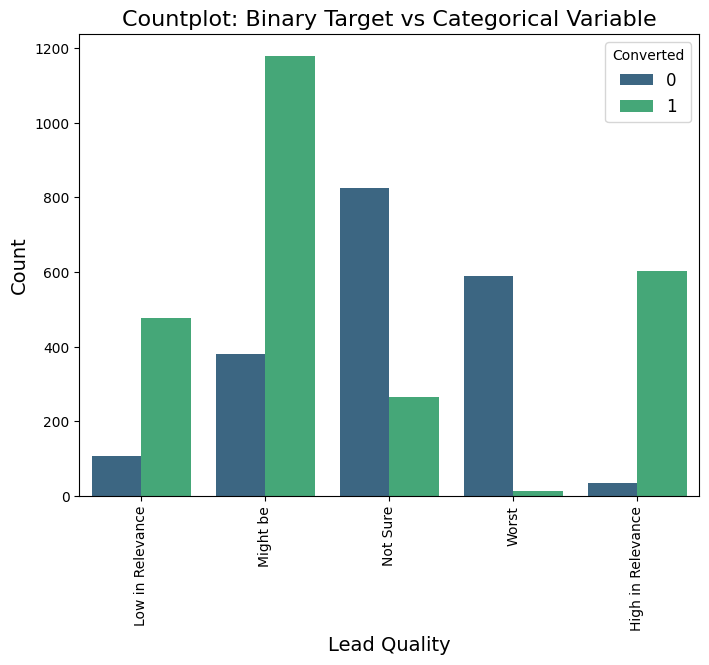

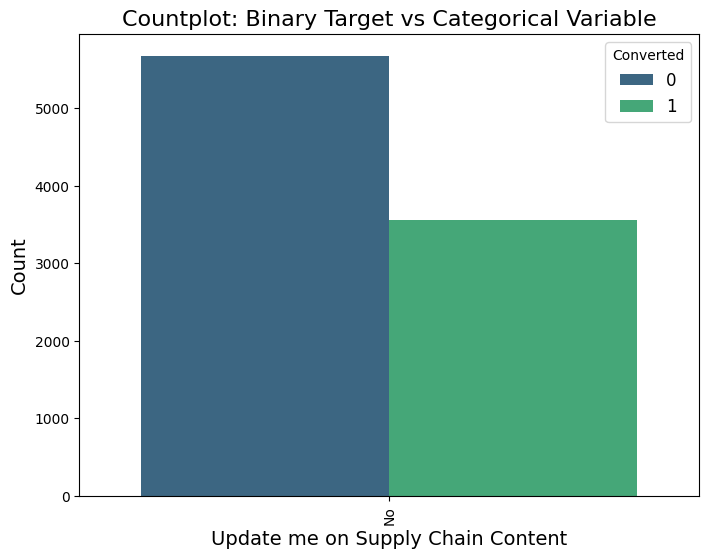

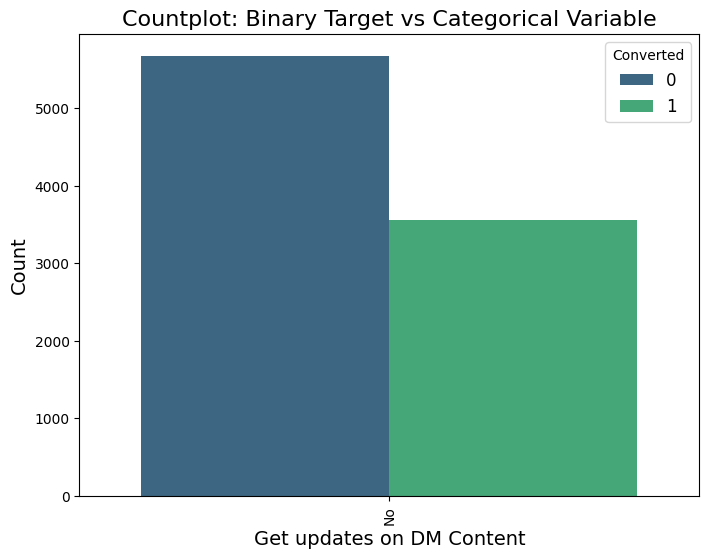

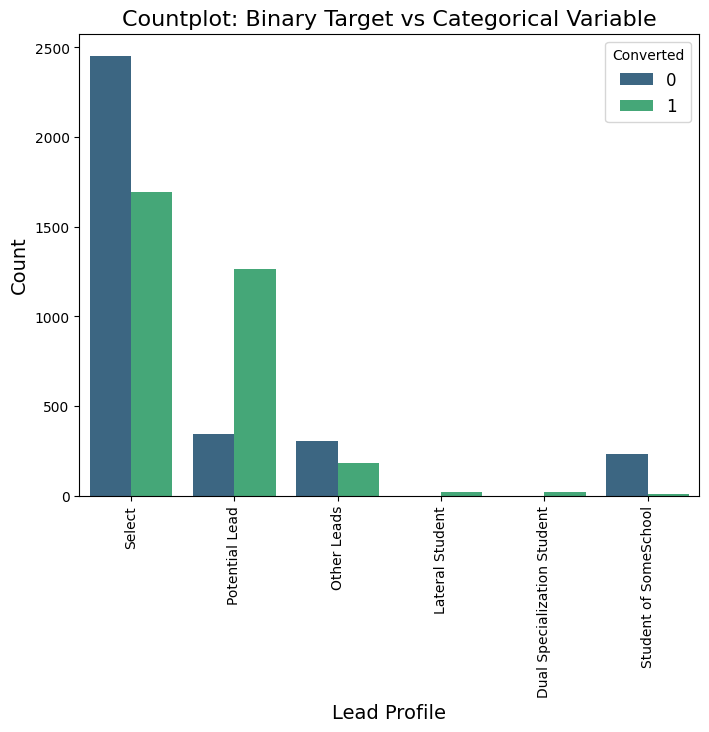

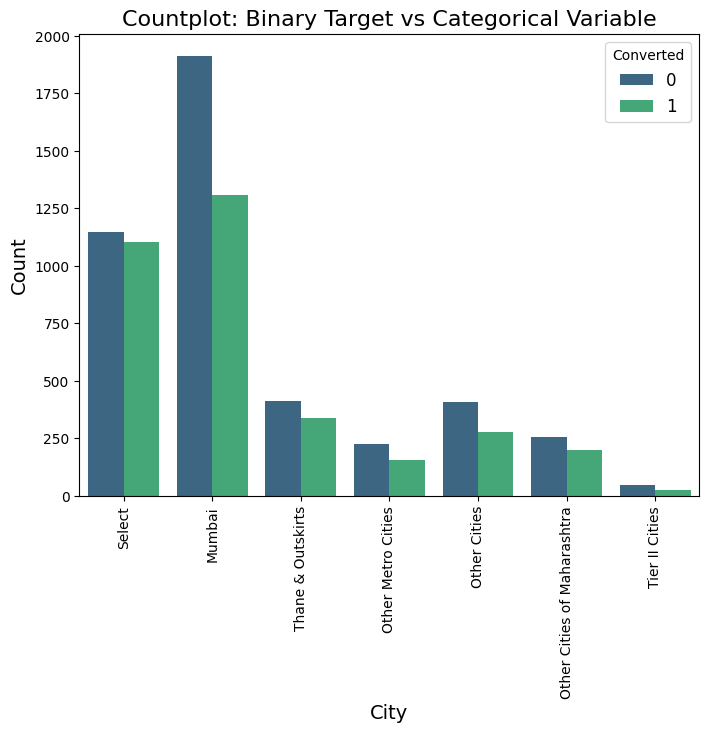

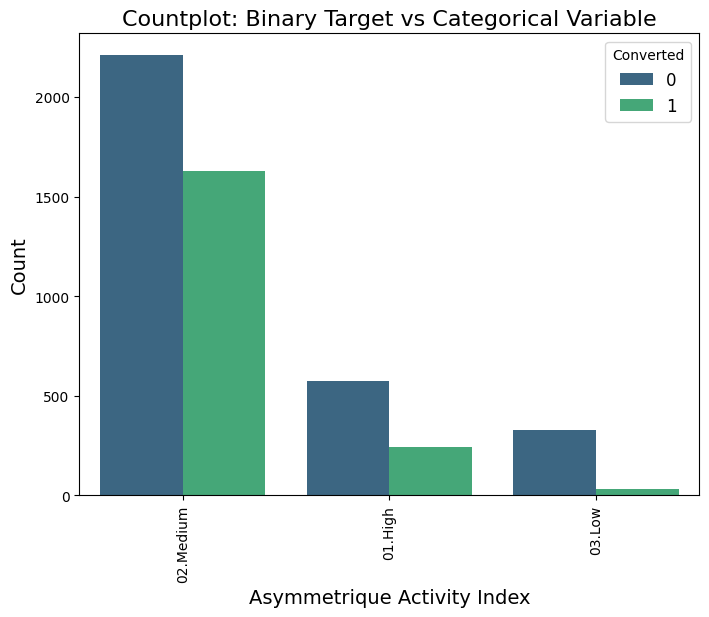

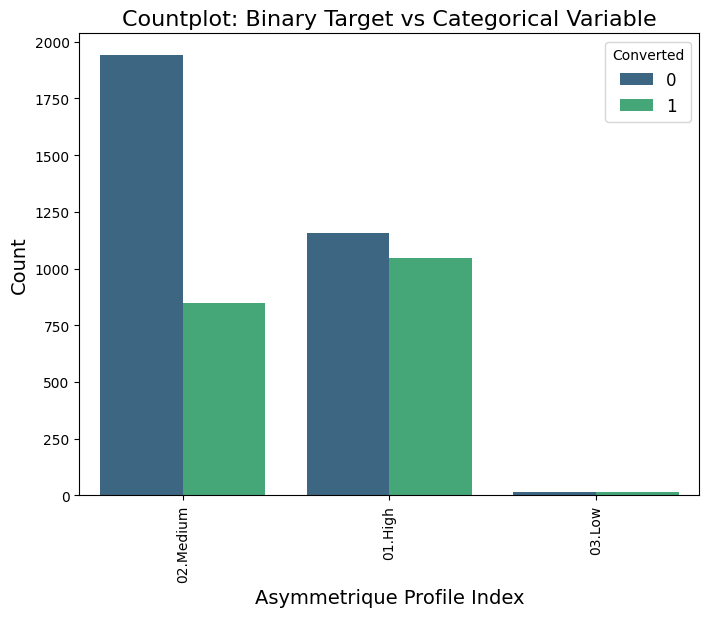

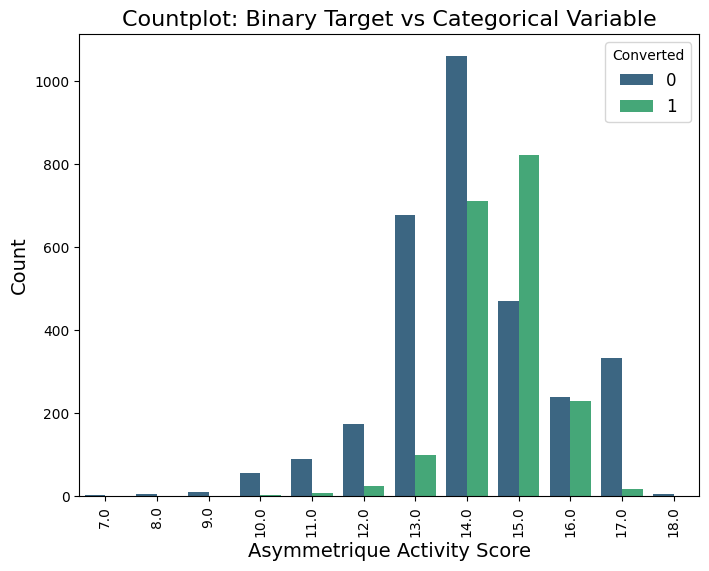

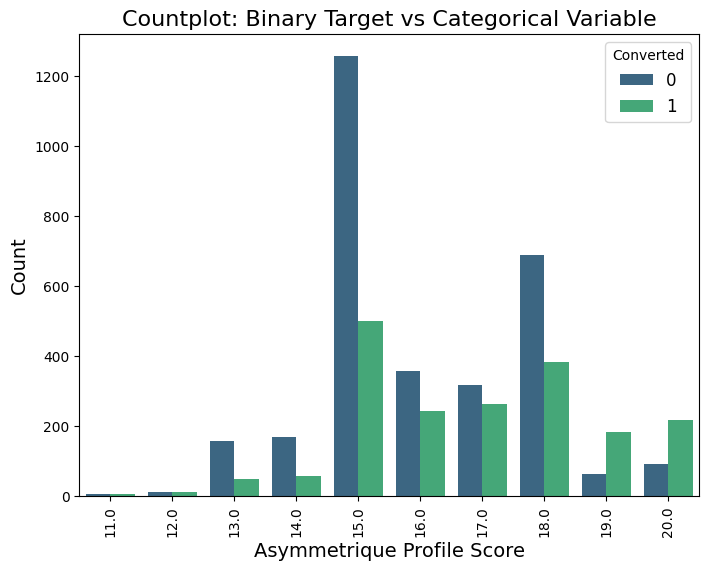

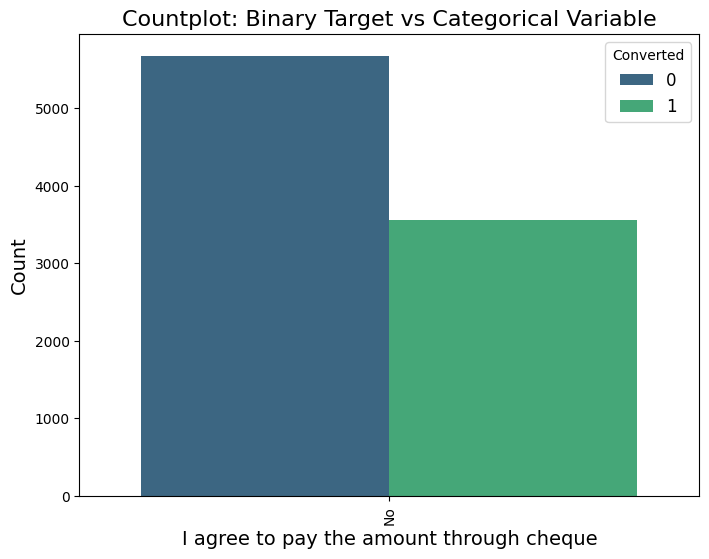

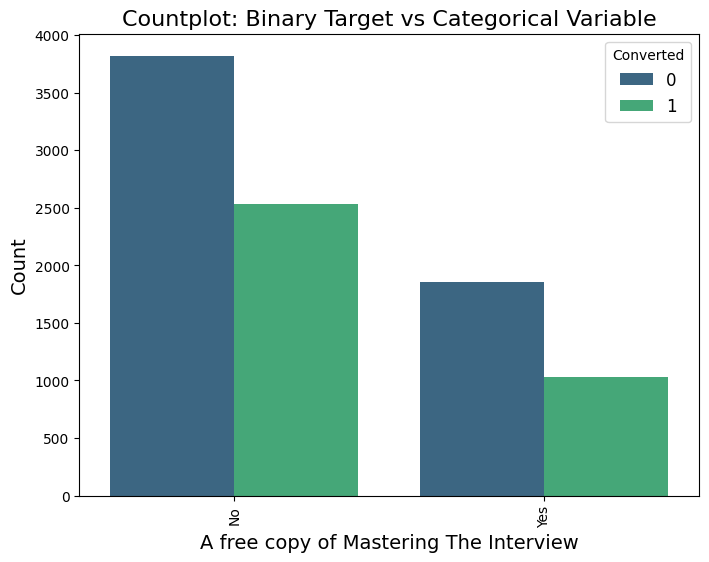

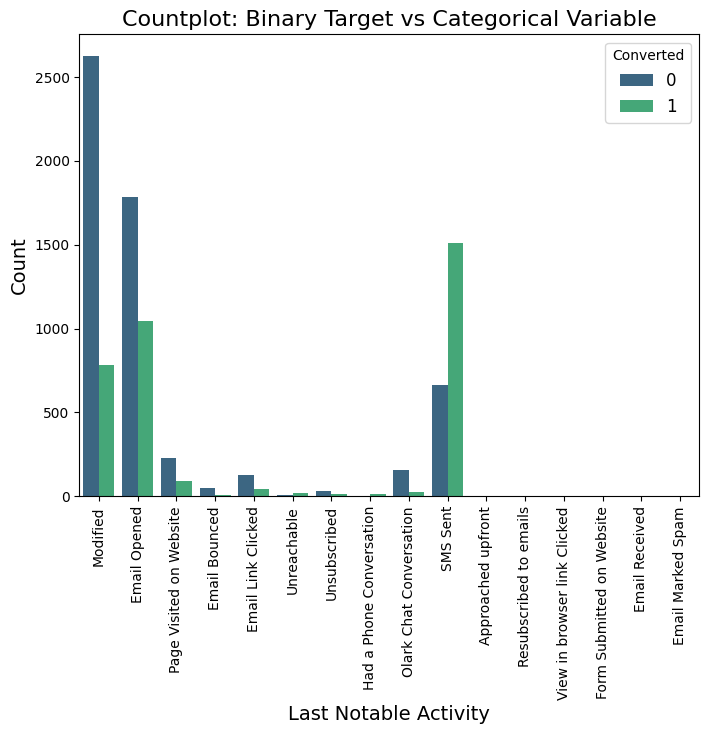

In [10]:
categorical_vars = []
for i in data.columns:
    if i not in numerical_vars:
        categorical_vars.append(i)

for i in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=i, hue='Converted', data=data, palette="viridis")
    plt.title('Countplot: Binary Target vs Categorical Variable', fontsize=16)
    plt.xlabel(i, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title="Converted", fontsize=12)
    plt.xticks(rotation = 90)
    plt.show()

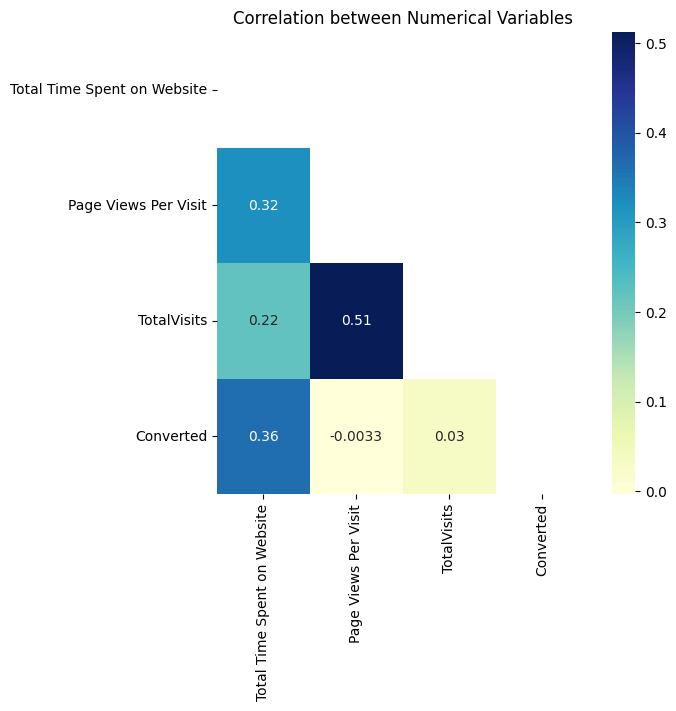

In [11]:
plt.figure(figsize = (6,6))
matrix = np.triu(data[['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits', 'Converted']].corr())
sns.heatmap(data[['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits', 'Converted']].corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

#### Replacing "Select" values into null values.

In [12]:
data.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [13]:
data.replace('Select', np.nan, inplace=True)

In [14]:
data.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [15]:
# We can notice that number of null values have increased after considering "Select" as null value too. 
# This is due to some people not selecting a specific category, and indirectly getting the default value i.e. "Select".

#### Now we'll deal with all missing values.

In [16]:
(data.isnull().mean() * 100).sort_values(ascending=False)
# finding the percentage of missing values in every column

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [17]:
# data = data.dropna(subset=['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity'])

#### Removing columns with more than 40% missing values.

In [18]:
# we will take threshold value of 40%, and remove all those columns containing missing values more than 40%.

threshold = 0.4

# Calculate the percentage of missing values in each column
missing_percentage = data.isnull().mean()

# Identify columns to drop (those with missing values above the threshold)
cols_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop those columns
data = data.drop(columns=cols_to_drop)

In [19]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [20]:
round(100*(data.isnull().sum()/len(df.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [21]:
(data.isnull().mean() * 100).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Do Not Call                                       0.000000
Lead Origin                                       0.000000
Lead Number                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Do Not Email                                      0.000000
Search                                            0.0000

#### Imputing the missing values with the Mode, since they're all categorical values. 

In [22]:
categorical_cols = data.select_dtypes(include=['object']).columns

# Fill missing values with the mode of each column
for col in categorical_cols:
    mode_value = data[col].mode()[0]  # Get the mode (most frequent value)
    data[col] = data[col].fillna(mode_value)  # Fill missing values with the mode

In [23]:
data.isnull().sum()

Lead Number                                        0
Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                     

In [24]:
numerical_cols = data.select_dtypes(include=['float64']).columns

# Fill missing values with the median of each column
for col in numerical_cols:
    median_value = data[col].median()  # Get the median (most frequent value)
    data[col] = data[col].fillna(median_value)  # Fill missing values with the mode

In [25]:
data.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [26]:
# now there are no null vlaue in the entire dataset

#### Converting binary (Yes/No) variable to numerical (1/0) columns.

In [27]:
binary_vars = [col for col in data if np.isin(df[col].unique(), ["No", "Yes"]).all()]
binary_vars

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [28]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[binary_vars] = data[binary_vars].apply(binary_map)

In [29]:
data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,Interested in other courses,0,0,Mumbai,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,Ringing,0,0,Mumbai,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


In [30]:
#Renaming columns with long names to short ones.
data = data.rename(columns={'What is your current occupation': 'Occupation', 'What matters most to you in choosing a course': 'Priority', 
                        'Total Time Spent on Website': 'TimeSpent', 'Page Views Per Visit': 'Views/Visit'})

#### checking for outliers.

In [31]:
numerical_vars = data[['Lead Number', 'Converted', 'TotalVisits', 'TimeSpent', 'Views/Visit']]

numerical_vars.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,TimeSpent,Views/Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


In [32]:
# p99 = data['TotalVisits'].quantile(0.99)
# data['TotalVisits'] = data['TotalVisits'].apply(lambda x: min(x, p99))

# sns.boxplot(y=data['TotalVisits'], x=data['Converted'])
# plt.show()

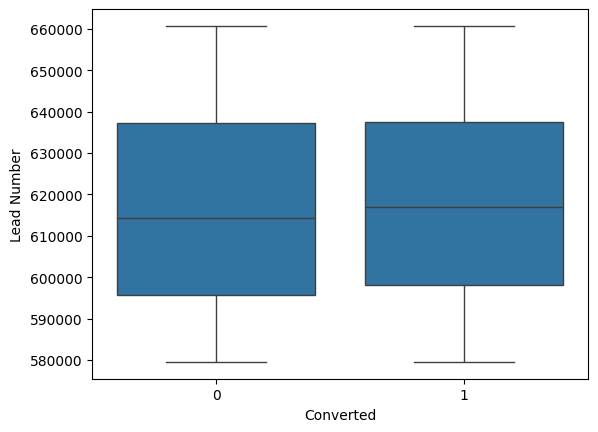

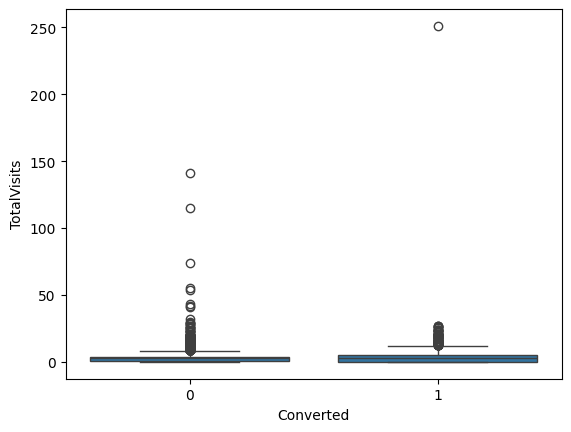

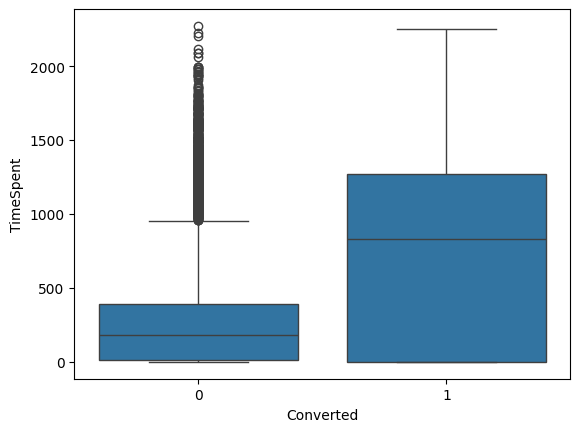

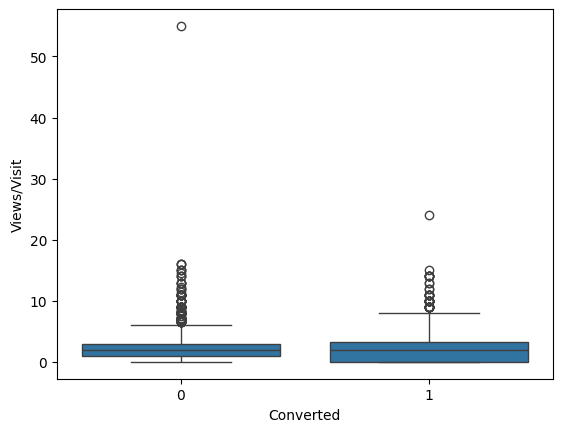

In [33]:
for col in ['Lead Number', 'TotalVisits', 'TimeSpent', 'Views/Visit']:
    sns.boxplot(y=data[col], x=data['Converted'])
    plt.show()
# plotting a boxplot to 

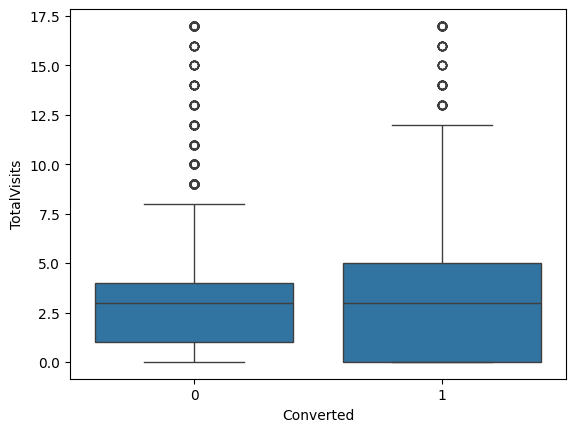

In [34]:
p99 = data['TotalVisits'].quantile(0.99)
data['TotalVisits'] = data['TotalVisits'].apply(lambda x: min(x, p99))

sns.boxplot(y=data['TotalVisits'], x=data['Converted'])
plt.show()

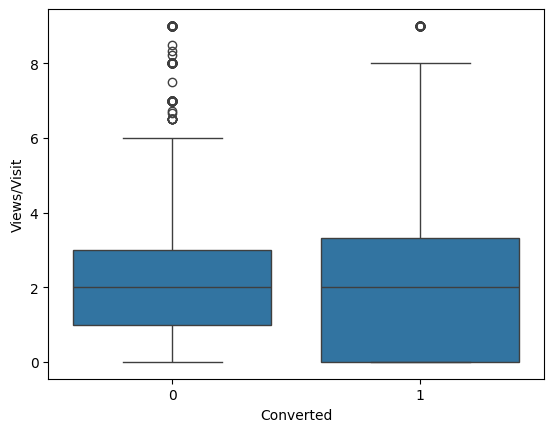

In [35]:
p99 = data['Views/Visit'].quantile(0.99)
data['Views/Visit'] = data['Views/Visit'].apply(lambda x: min(x, p99))
sns.boxplot(y=data['Views/Visit'], x=data['Converted'])
plt.show()

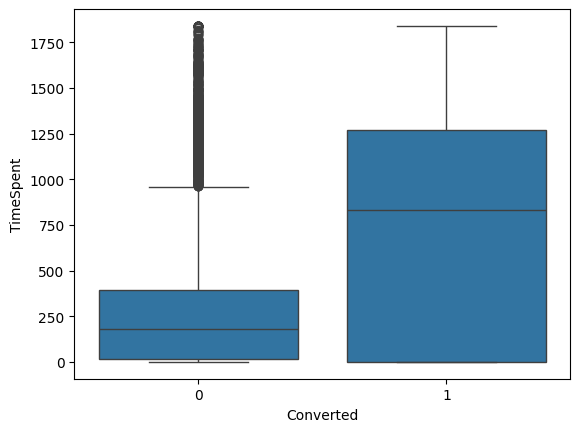

In [36]:
p99 = data['TimeSpent'].quantile(0.99)
data['TimeSpent'] = data['TimeSpent'].apply(lambda x: min(x, p99))
sns.boxplot(y=data['TimeSpent'], x=data['Converted'])
plt.show()

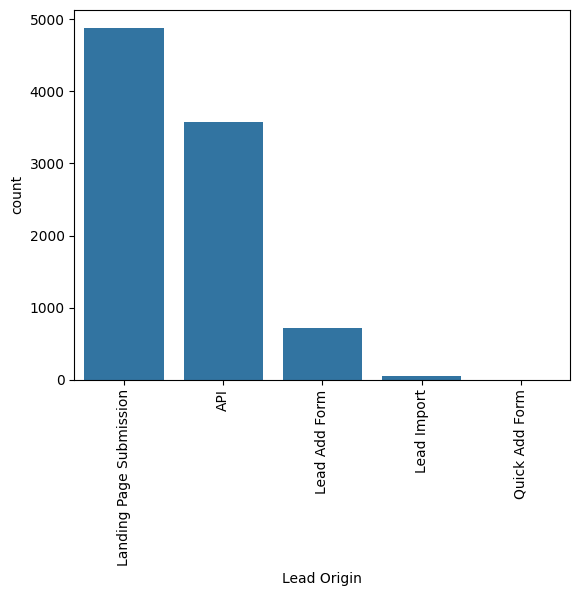

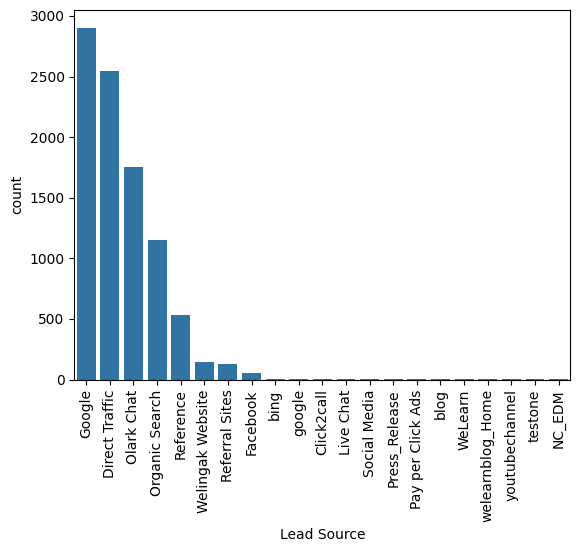

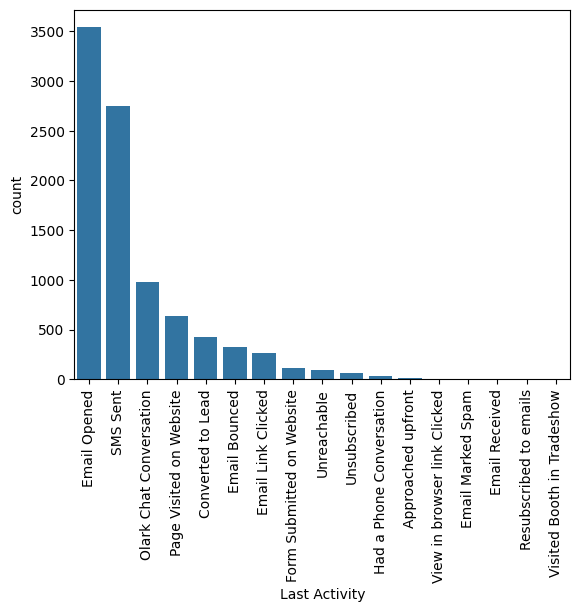

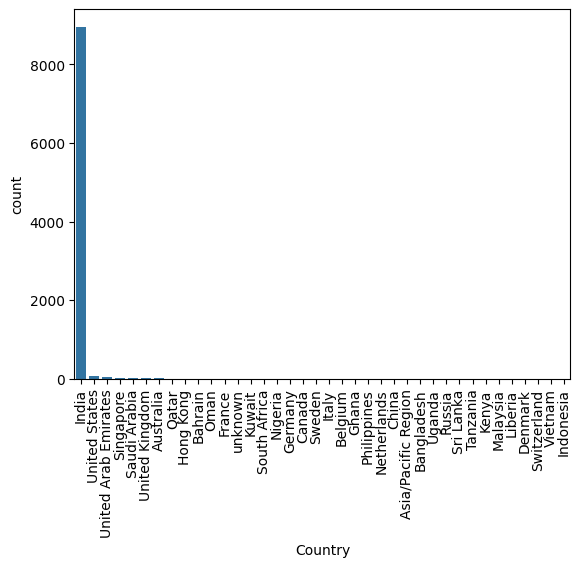

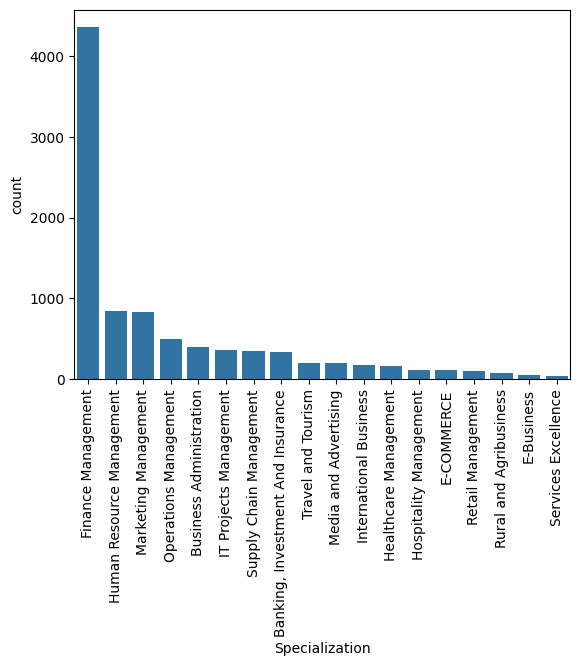

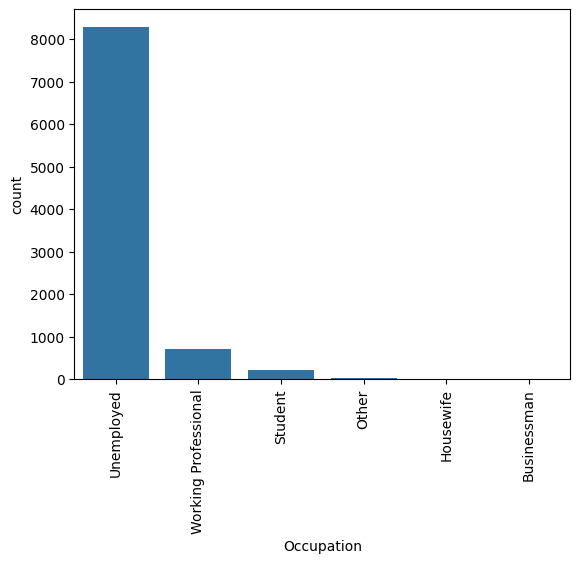

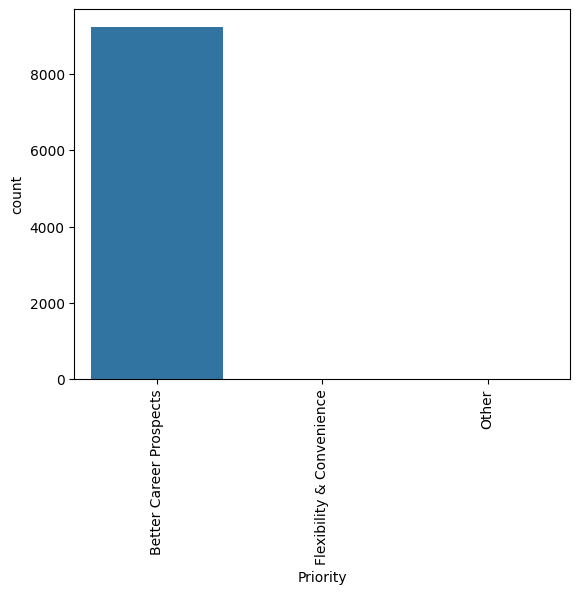

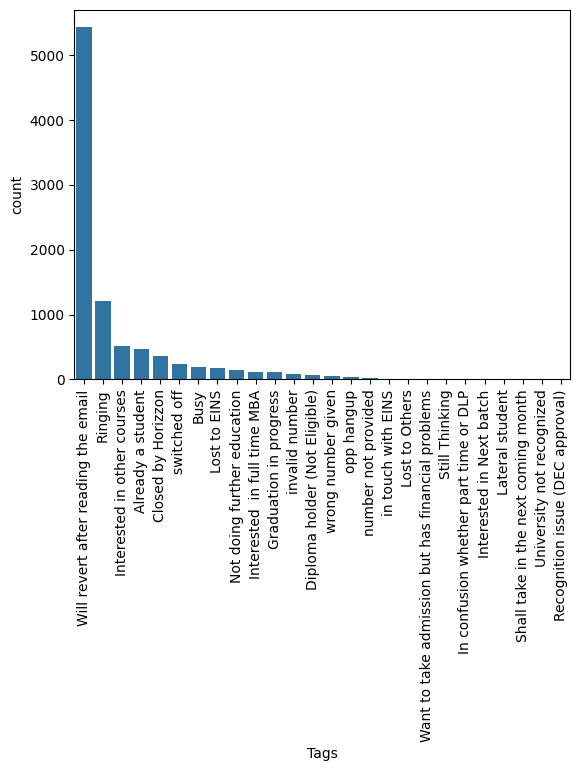

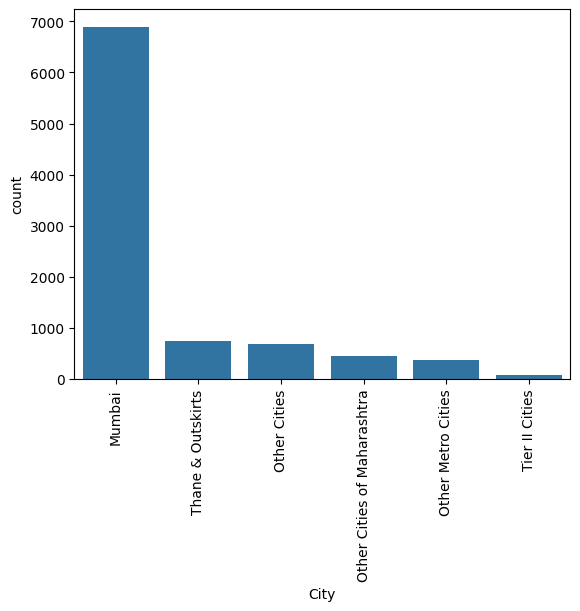

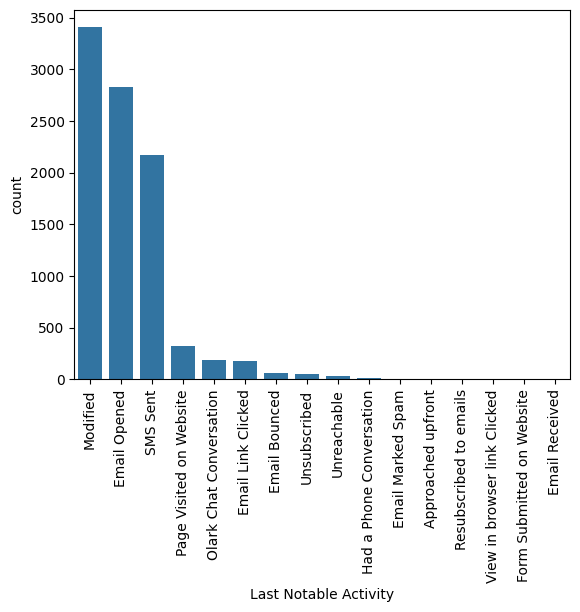

In [37]:
import seaborn as sns
categorical_columns = data.select_dtypes(include=['object', 'category'])
# cat_col = ~categorical_columns
for col in categorical_columns:
    if col != 'Converted': #and col != 'Page Views Per Visit':
        plt.xticks(rotation=90)
        sns.barplot(data[col].value_counts())
        plt.show()
        print('=====================================================================================')

#### Performing one-hot encoding on multiple category levels. 

In [38]:
dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'Occupation', 'Priority', 
                             'Tags', 'City', 'Last Notable Activity']], dtype=int, drop_first=True)

In [39]:
data = pd.concat([data, dummy], axis=1)

In [40]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'Occupation', 'Priority', 'Tags', 'City', 
                'Last Notable Activity'], axis = 1)

In [41]:
# Converting True & False values to 1 and 0 after encoding.
# data = data.replace({True: 1, False: 0})

data.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,TimeSpent,Views/Visit,Search,Magazine,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674.0,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305.0,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428.0,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = data.drop(['Converted'], axis=1)

X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,TimeSpent,Views/Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0.0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674.0,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,2.0,1532.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
y = data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

X_train[['Lead Number', 'TotalVisits', 'TimeSpent', 'Views/Visit']] = scaler.fit_transform(X_train[['Lead Number', 'TotalVisits', 
                                                                                                    'TimeSpent', 'Views/Visit']])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,TimeSpent,Views/Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,1.036534,0,0,-1.022595,-0.888014,-1.180474,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,-0.834353,0,0,0.205373,0.007668,-0.503379,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.412448,0,0,0.512365,-0.693060,0.092260,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,-1.251936,0,0,0.512365,1.374181,1.364995,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0.221650,0,0,-1.022595,-0.888014,-1.180474,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
# checking the conversion rate
converted = (sum(data['Converted'])/len(df['Converted'].index))*100
converted

38.53896103896104

In [49]:
# so, we have over 38.54% conversion rate

In [50]:
data['Converted'].value_counts(normalize=True)*100

Converted
0    61.461039
1    38.538961
Name: proportion, dtype: float64

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
import statsmodels.api as sm

In [53]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                          149
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 18 Feb 2025   Deviance:                       95880.
Time:                        22:57:20   Pearson chi2:                 4.69e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   3.694e+15   6.97e+07    5.3e+07      0.000    3.69e+15    3.69e+15
Lead Number                                             2.705e+13   9.17e+05   2.95e+07      0.000    2.71e+13    2.71e+13
Do Not Email                                           -3.421e+14   4.48e+06  -7.63e+07      0.000   -3.42e+14   -3.42e+14
Do Not Call                                             1.854e+15   4.77e+07   3.88e+07      0.000    1.85e+15    1.85e+15
TotalVisits                                             6.595e+13   1.29e+06   5.11e+07      0.000    6.59e+13    6.59e+13
TimeSpent                                               4.975e+14   9.89e+05   5.03e+08      0.000    4.98e+14    4.98e+14
Views/Visit                                             -6.59e+13   1.41e+06  -4.66e+07      0.000   -6.59e+13   -6.59e+13
Search                                                   1.71e+14   2.21e+07   7.72e+06      0.000    1.71e+14    1.71e+14
Magazine                                                -309.2407   3.33e-06  -9.28e+07      0.000    -309.241    -309.241
Newspaper Article                                       1.063e+15   6.74e+07   1.58e+07      0.000    1.06e+15    1.06e+15
X Education Forums                                      -1.97e+15   1.12e+08  -1.76e+07      0.000   -1.97e+15   -1.97e+15
Newspaper                                              -1.888e+16   6.73e+07   -2.8e+08      0.000   -1.89e+16   -1.89e+16
Digital Advertisement                                  -3.402e+15   4.82e+07  -7.06e+07      0.000    -3.4e+15    -3.4e+15
Through Recommendations                                 1.918e+15   2.86e+07    6.7e+07      0.000    1.92e+15    1.92e+15
Receive More Updates About Our Courses                   -85.6239   1.04e-06  -8.25e+07      0.000     -85.624     -85.624
Update me on Supply Chain Content                         87.6801   2.53e-06   3.47e+07      0.000      87.680      87.680
Get updates on DM Content                                 38.3174   9.19e-07   4.17e+07      0.000      38.317      38.317
I agree to pay the amount through cheque                 -20.3277    7.6e-07  -2.67e+07      0.000     -20.328     -20.328
A free copy of Mastering The Interview                 -1.082e+14   2.68e+06  -4.03e+07      0.000   -1.08e+14   -1.08e+14
Lead Origin_Landing Page Submission                     -7.38e+13      3e+06  -2.46e+07      0.000   -7.38e+13   -7.38e+13
Lead Origin_Lead Add Form                               1.365e+15    1.3e+07   1.05e+08      0.000    1.36e+15    1.36e+15
Lead Origin_Lead Import                                 1.557e+15   4.96e+07   3.14e+07      0.000    1.56e+15    1.56e+15
Lead Ori

In [54]:
X_train.shape

(6468, 164)

### FEATURE SELECTION USING RFE

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [56]:
rfe = RFE(model, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', np.False_, np.int64(101)),
 ('Do Not Email', np.True_, np.int64(1)),
 ('Do Not Call', np.False_, np.int64(78)),
 ('TotalVisits', np.False_, np.int64(90)),
 ('TimeSpent', np.False_, np.int64(10)),
 ('Views/Visit', np.False_, np.int64(96)),
 ('Search', np.False_, np.int64(129)),
 ('Magazine', np.False_, np.int64(150)),
 ('Newspaper Article', np.False_, np.int64(47)),
 ('X Education Forums', np.False_, np.int64(74)),
 ('Newspaper', np.False_, np.int64(113)),
 ('Digital Advertisement', np.False_, np.int64(51)),
 ('Through Recommendations', np.False_, np.int64(134)),
 ('Receive More Updates About Our Courses', np.False_, np.int64(149)),
 ('Update me on Supply Chain Content', np.False_, np.int64(147)),
 ('Get updates on DM Content', np.False_, np.int64(146)),
 ('I agree to pay the amount through cheque', np.False_, np.int64(148)),
 ('A free copy of Mastering The Interview', np.False_, np.int64(61)),
 ('Lead Origin_Landing Page Submission', np.False_, np.int64(29)),
 ('Lead O

In [58]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation',
       'Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'Do Not Call', 'TotalVisits', 'TimeSpent', 'Views/Visit',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper',
       ...
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=149)

In [60]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.8
Date:                Tue, 18 Feb 2025   Deviance:                       4147.6
Time:                        22:57:36   Pearson chi2:                 1.16e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4975
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -4.0978      0.208    -19.689      0.000      -4.506      -3.690
Do Not Email                                      -1.4320      0.171     -8.354      0.000      -1.768      -1.096
Lead Origin_Lead Add Form                          2.4038      0.213     11.271      0.000       1.986       2.822
Last Activity_Olark Chat Conversation             -1.7036      0.164    -10.377      0.000      -2.025      -1.382
Occupation_Working Professional                    2.8980      0.232     12.509      0.000       2.444       3.352
Tags_Busy                                          3.0193      0.298     10.141      0.000       2.436       3.603
Tags_Closed by Horizzon                            8.7506      1.027      8.520      0.000       6.738      10.764
Tags_Interested in Next batch                     24.4030      2e+04      0.001      0.999   -3.91e+04    3.92e+04
Tags_Lateral student                              25.8717   2.29e+04      0.001      0.999   -4.48e+04    4.49e+04
Tags_Lost to EINS                                  8.2410      0.750     10.986      0.000       6.771       9.711
Tags_Ringing                                      -1.1039      0.305     -3.622      0.000      -1.701      -0.507
Tags_Will revert after reading the email           3.5918      0.209     17.168      0.000       3.182       4.002
Tags_in touch with EINS                            2.9423      0.763      3.858      0.000       1.448       4.437
Tags_switched off                                 -1.2705      0.555     -2.290      0.022      -2.358      -0.183
Last Notable Activity_Had a Phone Conversation     3.5546      1.312      2.709      0.007       0.983       6.127
Last Notable Activity_SMS Sent                     2.4830      0.109     22.757      0.000       2.269       2.697
==================================================================================================================
"""

In [61]:
col = col.drop(['Tags_Interested in Next batch'], 1)
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation',
       'Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_in touch with EINS', 'Tags_switched off',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.4
Date:                Tue, 18 Feb 2025   Deviance:                       4164.7
Time:                        22:57:36   Pearson chi2:                 1.15e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4961
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.9621      0.195    -20.336      0.000      -4.344      -3.580
Do Not Email                                      -1.4112      0.170     -8.278      0.000      -1.745      -1.077
Lead Origin_Lead Add Form                          2.4084      0.213     11.333      0.000       1.992       2.825
Last Activity_Olark Chat Conversation             -1.6999      0.164    -10.362      0.000      -2.021      -1.378
Occupation_Working Professional                    2.8713      0.229     12.555      0.000       2.423       3.320
Tags_Busy                                          2.8685      0.289      9.930      0.000       2.302       3.435
Tags_Closed by Horizzon                            8.6138      1.024      8.409      0.000       6.606      10.622
Tags_Lateral student                              24.7324   1.39e+04      0.002      0.999   -2.71e+04    2.72e+04
Tags_Lost to EINS                                  8.1037      0.746     10.856      0.000       6.641       9.567
Tags_Ringing                                      -1.2660      0.295     -4.285      0.000      -1.845      -0.687
Tags_Will revert after reading the email           3.4508      0.196     17.614      0.000       3.067       3.835
Tags_in touch with EINS                            2.8037      0.760      3.689      0.000       1.314       4.293
Tags_switched off                                 -1.4323      0.550     -2.605      0.009      -2.510      -0.355
Last Notable Activity_Had a Phone Conversation     3.5044      1.287      2.724      0.006       0.983       6.026
Last Notable Activity_SMS Sent                     2.5137      0.109     22.993      0.000       2.299       2.728
==================================================================================================================
"""

In [63]:
col = col.drop(['Tags_Lateral student'], 1)
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation',
       'Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2090.5
Date:                Tue, 18 Feb 2025   Deviance:                       4181.1
Time:                        22:57:36   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4949
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.8818      0.188    -20.594      0.000      -4.251      -3.512
Do Not Email                                      -1.4143      0.170     -8.306      0.000      -1.748      -1.081
Lead Origin_Lead Add Form                          2.4157      0.212     11.395      0.000       2.000       2.831
Last Activity_Olark Chat Conversation             -1.7018      0.164    -10.380      0.000      -2.023      -1.380
Occupation_Working Professional                    2.8545      0.227     12.575      0.000       2.410       3.299
Tags_Busy                                          2.7904      0.285      9.806      0.000       2.233       3.348
Tags_Closed by Horizzon                            8.5334      1.023      8.340      0.000       6.528      10.539
Tags_Lost to EINS                                  8.0240      0.745     10.772      0.000       6.564       9.484
Tags_Ringing                                      -1.3429      0.291     -4.611      0.000      -1.914      -0.772
Tags_Will revert after reading the email           3.3717      0.190     17.778      0.000       3.000       3.743
Tags_in touch with EINS                            2.7239      0.758      3.592      0.000       1.238       4.210
Tags_switched off                                 -1.5079      0.548     -2.754      0.006      -2.581      -0.435
Last Notable Activity_Had a Phone Conversation     3.4726      1.273      2.728      0.006       0.978       5.968
Last Notable Activity_SMS Sent                     2.5090      0.109     23.031      0.000       2.295       2.722
==================================================================================================================
"""

In [65]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.005354
6795    0.375188
3516    0.005354
8105    0.062056
3934    0.375188
4844    0.992259
3297    0.005354
8071    0.999951
987     0.375188
7423    0.880686
dtype: float64

In [66]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00535355, 0.37518844, 0.00535355, 0.06205559, 0.37518844,
       0.99225863, 0.00535355, 0.99995091, 0.37518844, 0.88068641])

In [67]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID
0,0,0.005354,1871
1,0,0.375188,6795
2,0,0.005354,3516
3,0,0.062056,8105
4,0,0.375188,3934


In [68]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted
0,0,0.005354,1871,0
1,0,0.375188,6795,0
2,0,0.005354,3516,0
3,0,0.062056,8105,0
4,0,0.375188,3934,0


In [69]:
from sklearn import metrics

In [70]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3869  133]
 [ 786 1680]]


In [71]:
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8579158936301794


#### Checking VIFs

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,1.59
12,Last Notable Activity_SMS Sent,1.51
1,Lead Origin_Lead Add Form,1.30
5,Tags_Closed by Horizzon,1.20
3,Occupation_Working Professional,1.18
2,Last Activity_Olark Chat Conversation,1.13
7,Tags_Ringing,1.10
0,Do Not Email,1.06
10,Tags_switched off,1.04
4,Tags_Busy,1.03


In [74]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2090.5
Date:                Tue, 18 Feb 2025   Deviance:                       4181.1
Time:                        22:57:36   Pearson chi2:                 1.14e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4949
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.8818      0.188    -20.594      0.000      -4.251      -3.512
Do Not Email                                      -1.4143      0.170     -8.306      0.000      -1.748      -1.081
Lead Origin_Lead Add Form                          2.4157      0.212     11.395      0.000       2.000       2.831
Last Activity_Olark Chat Conversation             -1.7018      0.164    -10.380      0.000      -2.023      -1.380
Occupation_Working Professional                    2.8545      0.227     12.575      0.000       2.410       3.299
Tags_Busy                                          2.7904      0.285      9.806      0.000       2.233       3.348
Tags_Closed by Horizzon                            8.5334      1.023      8.340      0.000       6.528      10.539
Tags_Lost to EINS                                  8.0240      0.745     10.772      0.000       6.564       9.484
Tags_Ringing                                      -1.3429      0.291     -4.611      0.000      -1.914      -0.772
Tags_Will revert after reading the email           3.3717      0.190     17.778      0.000       3.000       3.743
Tags_in touch with EINS                            2.7239      0.758      3.592      0.000       1.238       4.210
Tags_switched off                                 -1.5079      0.548     -2.754      0.006      -2.581      -0.435
Last Notable Activity_Had a Phone Conversation     3.4726      1.273      2.728      0.006       0.978       5.968
Last Notable Activity_SMS Sent                     2.5090      0.109     23.031      0.000       2.295       2.722
==================================================================================================================
"""

In [75]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [76]:
y_train_pred[:10]

array([0.00535355, 0.37518844, 0.00535355, 0.06205559, 0.37518844,
       0.99225863, 0.00535355, 0.99995091, 0.37518844, 0.88068641])

In [77]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [78]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted
0,0,0.005354,1871,0
1,0,0.375188,6795,0
2,0,0.005354,3516,0
3,0,0.062056,8105,0
4,0,0.375188,3934,0


In [79]:
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8579158936301794


### Metrics beyond simply accuracy

In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0]

In [81]:
# to see the sensitivity of our model
print(TP / float(TP+FN))

0.681265206812652


In [82]:
# calculating specificity
print(TN / float(TN+FP))

0.9667666166916542


In [83]:
# Calculate false postive rate - predicting lead when visitor does not have converted
print(FP/ float(TN+FP))

0.033233383308345826


In [84]:
# positive predictive value 
print (TP / float(TP+FP))

0.9266409266409267


In [85]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8311493018259936


In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

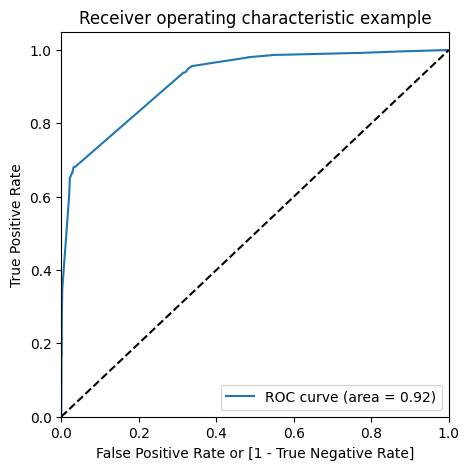

In [88]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Finding optimal cut off point

In [89]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005354,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.375188,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.005354,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.062056,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.375188,3934,0,1,1,1,1,0,0,0,0,0,0


In [90]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.747372  0.964315  0.613693
0.2   0.2  0.774273  0.956610  0.661919
0.3   0.3  0.781385  0.938767  0.684408
0.4   0.4  0.856215  0.681265  0.964018
0.5   0.5  0.857916  0.681265  0.966767
0.6   0.6  0.858689  0.681265  0.968016
0.7   0.7  0.855133  0.667478  0.970765
0.8   0.8  0.854669  0.665045  0.971514
0.9   0.9  0.750773  0.350770  0.997251


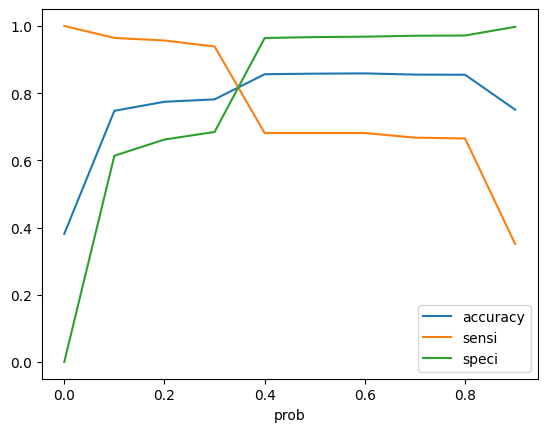

In [91]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [92]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.005354,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.375188,6795,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.005354,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.062056,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.375188,3934,0,1,1,1,1,0,0,0,0,0,0,1


In [93]:
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.7813852813852814

In [94]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[2739, 1263],
       [ 151, 2315]])

In [95]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] 

In [96]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

0.9387672343876723


In [97]:
# Let us calculate specificity
print(TN / float(TN+FP))

0.684407796101949


In [98]:
# Calculate false postive rate - predicting lead when visitor does not have converted
print(FP/ float(TN+FP))

0.315592203898051


In [99]:
# Positive predictive value 
print(TP / float(TP+FP))

0.6470095025153717


In [100]:
# Negative predictive value 
print(TN / float(TN+ FN))

0.9477508650519031


### Precision and Recall

In [101]:
#Looking at the confusion matrix again

In [102]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
confusion

array([[3869,  133],
       [ 786, 1680]])

In [103]:
# Precision
print(confusion[1,1]/(confusion[0,1] + confusion[1,1]))

0.9266409266409267


In [104]:
# Recall
print(confusion[1,1]/(confusion[1,0] + confusion[1,1]))

0.681265206812652


In [105]:
from sklearn.metrics import precision_score, recall_score

In [106]:
precision_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.9266409266409267

In [107]:
recall_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.681265206812652

### Precision and recall tradeoff

In [108]:
from sklearn.metrics import precision_recall_curve

In [109]:
y_train_pred_final.Convert, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Convert, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [110]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

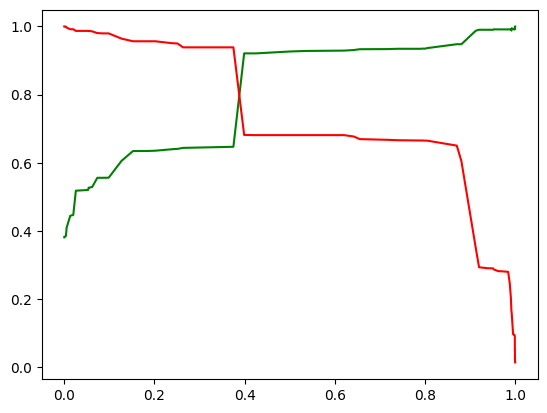

In [111]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predicting on the Test dataset

In [112]:
X_test[['TimeSpent', 'TotalVisits', 'Views/Visit', 'Lead Number']] = scaler.fit_transform(X_test[['TimeSpent', 'TotalVisits', 
                                                                                                  'Views/Visit', 'Lead Number']])

In [113]:
X_test = X_test[col]
X_test.columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation',
       'Occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [114]:
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Last Activity_Olark Chat Conversation,Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
4269,0,0,0,0,0,0,0,0,1,0,0,0,1
2376,0,1,0,0,0,0,0,0,1,0,0,0,1
7766,0,0,0,1,0,0,0,0,1,0,0,0,0
9199,0,0,1,0,0,0,0,0,0,0,0,0,0
4359,0,1,0,0,0,0,0,0,1,0,0,0,0


In [115]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [116]:
y_test_pred = res.predict(X_test_sm)

In [117]:
y_test_pred[:10]

4269    0.880686
2376    0.988046
7766    0.912491
9199    0.003745
4359    0.870530
9186    0.880686
1631    0.375188
8963    0.375188
8007    0.375188
5324    0.880686
dtype: float64

In [118]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [119]:
y_pred_1.head()

,0
4269,0.880686
2376,0.988046
7766,0.912491
9199,0.003745
4359,0.870530


In [120]:
y_test_df = pd.DataFrame(y_test)
y_test_df

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1
...,...
8649,0
2152,1
7101,0
5331,0


In [121]:
y_test_df['LeadID'] = y_test_df.index

In [122]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [123]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [124]:
y_pred_final.head()

,Converted,LeadID,0
0,1,4269,0.880686
1,1,2376,0.988046
2,1,7766,0.912491
3,0,9199,0.003745
4,1,4359,0.870530


In [125]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [126]:
y_pred_final = y_pred_final.reindex(columns=['LeadID', 'Converted', 'Convert_Prob'])

In [127]:
y_pred_final.head()

,LeadID,Converted,Convert_Prob
0,4269,1,0.880686
1,2376,1,0.988046
2,7766,1,0.912491
3,9199,0,0.003745
4,4359,1,0.870530


In [128]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [129]:
y_pred_final.head()

,LeadID,Converted,Convert_Prob,final_predicted
0,4269,1,0.880686,1
1,2376,1,0.988046,1
2,7766,1,0.912491,1
3,9199,0,0.003745,0
4,4359,1,0.870530,1


In [130]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8488455988455988

In [131]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1612,   65],
       [ 354,  741]])

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# calculating the sensitivity of our logistic regression model
print(TP / float(TP+FN))

0.6767123287671233


In [134]:
# calculating specificity of our logistic regression model
print(TN / float(TN+FP))

0.9612403100775194


In [135]:
y_pred_final['Convert_Prob'] = y_pred_final['Convert_Prob'].apply(lambda x: x*100)

In [136]:
y_pred_final = y_pred_final.rename(columns = { 'Convert_Prob' : 'Lead_Score'})

In [137]:
y_pred_final.head()

,LeadID,Converted,Lead_Score,final_predicted
0,4269,1,88.068641,1
1,2376,1,98.804555,1
2,7766,1,91.249101,1
3,9199,0,0.374512,0
4,4359,1,87.053050,1


In [138]:
y_pred_final

,LeadID,Converted,Lead_Score,final_predicted
0,4269,1,88.068641,1
1,2376,1,98.804555,1
2,7766,1,91.249101,1
3,9199,0,0.374512,0
4,4359,1,87.053050,1
...,...,...,...,...
2767,8649,0,37.518844,0
2768,2152,1,98.804555,1
2769,7101,0,2.019793,0
2770,5331,0,12.737758,0
